### Введение
Данный проект был написан в рамках хакатона, проводимого летней школой СЛОН http://school-slon.ru/. В рамках выполнения задания была построена модель для определения временной принадлежности картины/фрески к тому или иному историческому периоду.

### Описание алгоритма
Данные брались с сайта 
https://www.wga.hu


In [23]:
import pandas
import os
import seaborn as sns
from tqdm.notebook import tqdm
import numpy
import pickle
import torch
path2data = '../../data/wga/'
df = pandas.read_csv(os.path.join(path2data, 'prepared.csv'), header=None)
df

,0,1,2
0,42b4327281e1bb16e19647d5aac727ab.jpg,1574,1574-88
1,f0aa8fe52e17ae347b51f5447b63401c.jpg,1598,1598
2,a16b6a572701af2fba7ad2f4fc01a01c.jpg,1602,1602
3,b8c48933d18e247f02f204f758280a63.jpg,1595,1595-98
4,57cb980521e2a7772224a782c34367d4.jpg,1593,1593
...,...,...,...
44654,853d91d71288c90a914e67e808714aea.jpg,1682,1682
44655,b9c51c05af63efc1f7005922fcff53f3.jpg,1854,1854-62
44656,a11eb6f75a934dd5e920abfb092ed199.jpg,1854,1854-62
44657,fd303c60e82940feb4559387621e70b9.jpg,1854,1854-62


In [30]:
vals = list(set(df[df[1] < 1300][2]))
k = 5
for i in range(0, len(vals), k):
    print(*vals[i:i + k])

begun 1250 1085-90 780-890 c. 840 1290-1310
326-30 begun 1079 1175-1220 1235-49 1191
1250-1300 982-83 1265-68 1190-98 750-70
1240-1300 after 1192 c. 1260 1080-85 1153-1265
c. 1210 1228-29 800-30 1077-1115 begun c. 1100
1070-1150 1290s from 1066 1203-78 790s
1080-1100 1181-1230 c. 1040 1150-1230 1235-40
begun c. 1222 1195-1230 1110-45 1107-18 962-68
1028-72 1250-70 815-27 349 c. 1115
750-800 1002-16 1220-66 completed 1009 630s
280s 1297-99 1027-1082 548-65 781-83
1152-54 1032 1063-97 1281 1230-40
1149 1270 1036-94 1150-70 begun 1133
1225-30 1168-88 1252-75 1150-60 1264-67
1025-40 1220-22 after 1282 begun 1204 1208-28
c. 540 780-800 c. 1093 1284 725-50
1120-46 1245-50 1151 1217-54 1297
c. 1180 after 1260 begun 1285 1272 1090-1130
before 1000 c. 1025 1235 1240-50 649-72
869-70 380-400 1131-1240 c. 1050 783-95
674-96 1170-75 c. 1007 1280-90 after 1020
c. 1078 1270-75 1070-1129 c. 1270 around 1050
400-20 1066-90 begun 1093-1119 1260-88 around 1030
c. 700 founded c. 1170 c. 1218 c. 1063 1170

Wrong labels

1294-1368
1298-1332
1298-1307
1284-1316

In [24]:
for i in range(0, 1000, 10):
    print(df[df[1] < 1300].iloc[i:i+10].head())

                                         0     1              2
261   574ca364a4307f347e9207f2af9d812b.jpg  1246  began c. 1246
262   6b1a737cfb434e20d663c7345b17b463.jpg  1246   c. 1246-1470
1102  f835c0493450a5f492460ae0d4f314c9.jpg  1200        c. 1200
1103  ce652ae8804ee323f217f863085dde89.jpg  1200        c. 1200
1104  9a9f8c4efd169758d74a6754ab5e9ae5.jpg  1200        c. 1200
                                         0     1            2
1110  5680e8e84016940a46a52fdc35ed4c5b.jpg  1200      c. 1200
1111  27385bcd8ea62b6561fc3284c4485e6c.jpg  1200      c. 1200
1112  11761b59558458cd50f1dffbac110874.jpg  1210        1210s
1211  a3538590e83606e1534dec511802514d.jpg  1295  before 1295
1244  63f79d234e8bf6a261d867f1e0c707a8.jpg  1100      c. 1100
                                         0    1       2
1260  4caad3bcff70e50a8201b53c5a122ea6.jpg  526  c. 526
1261  87c5b9e210489319735a948bcf2b336f.jpg  526  c. 526
1262  aed2bccee47d466b4cd470b795e8c17d.jpg  526  c. 526
1263  c9f3a0618c17db

In [25]:
for i in range(1000, 4000, 10):
    print(df[df[1] < 1300].iloc[i:i+10].head())

                                         0    1       2
2814  f0ac6feca3bf184422e52b180a066036.jpg  850  c. 850
2815  55ae7a19053b81cae6c789bf183987bf.jpg  900  900-20
2816  0122fe6061ac527cb6d04a362e2a7bb3.jpg  900  900-20
2817  88fcd821c6f9737a6be723245b1d807f.jpg  900  900-20
2818  a49f0ea802082f05323ee85d7736c1e2.jpg  900  900-20
                                         0     1          2
2824  f5bb86ce5f858a5a3fc552ab337dca5a.jpg  1063  1063-1100
2825  8fba50f12db38649108e8fd511b204d0.jpg  1066  1066-1100
2826  6281510fc7d1c0fb446a365bb224ba97.jpg  1066  1066-1100
2827  ac684a07e236000791a5f36d975d2dca.jpg  1066  1066-1100
2828  5d4fe9f8ea8497022eac259dc23e702c.jpg  1075  1075-1125
                                         0     1          2
2834  4bc631b91ee0077e19f9c146ac03947e.jpg  1149       1149
2835  74fc3223ee8bfb94f5791a8ed95de640.jpg  1109  1109-1200
2836  58f0327b4220036c152020fb74699bc6.jpg  1109  1109-1200
2837  c0e63e36379f0292d57a7ecebc19757b.jpg  1109  1109-1200
2838

                                          0     1          2
25637  918139b820033710738d8ad927127d8d.jpg  1196  1196-1216
25638  2bf520ea6e96bc9ac2ea788a13c9e74f.jpg  1196  1196-1216
25639  9920872264690c399e5ddca8c1d695a9.jpg  1200    1200-20
25640  4e0baa97fc4a48db09f034d47ba6ca9d.jpg  1200    1200-20
25641  375c4561eab6fa38e34c0ed119e4564e.jpg  1210      1210s
                                          0     1             2
25647  feb4bace608d0f2cc18627445d2576aa.jpg  1150       c. 1150
25648  db63bc07ed13caab07b6b0496a401cd8.jpg  1150  12th century
25649  3fa5c8c0991c81c12d091570103234f3.jpg  1250  13th century
25650  d78a05beb26c504c3ef11475488e40e1.jpg  1250       c. 1250
25651  8f7592ebdc095e989424262e7a340ccd.jpg  1250       c. 1250
                                          0     1             2
25666  f350d0fad67bda7930170beb2304778e.jpg  1050  11th century
25667  89f27aa61b37dc0a02057aa3a149e9ab.jpg  1050  11th century
25668  0da0327cb31ba57cb245ef89f38e016e.jpg  1100       c.

                                          0     1        2
29075  ceeaf767fe1a4161b064ad943374a782.jpg  1140  1140-70
29076  84d0a61e78a37323480b75cdf8aee4ab.jpg  1140  1140-70
29077  3355182e93b5d21198c58e8c5c204a50.jpg  1140  1140-70
29078  96f1740ac2fa14835cc18f6020080ebf.jpg  1140  1140-70
29079  092ff90e11c7d9ed41d31ece8fde7876.jpg  1140  1140-70
                                          0     1        2
29085  c4ea07279dae92dd38c986b6bba4fe80.jpg  1140  1140-70
29086  d8ca791b686211c1868c7049c76483f8.jpg  1140  1140-70
29087  f04d1666eb153b911c04c41131f5304b.jpg  1140  1140-70
29088  36e5fbba576f8d06a9875000bab1172b.jpg  1140  1140-70
29089  ce48dee4313ad66dce3cac909bfcea6f.jpg  1140  1140-70
                                          0     1      2
29095  d9ebfc20b811af5c9974f8dd738455d4.jpg  1180  1180s
29096  aaead7b976ba8e735df52a5e937b508c.jpg  1180  1180s
29097  704b3c63b4077d3773a80f8a011ec92a.jpg  1180  1180s
29098  cafdd32796f225892390c7b7863afb45.jpg  1180  1180s
29099  

Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty DataFrame
Columns: [0, 1, 2]
Index: []
Empty Data

In [ ]:
for i in range(2000, 3000, 10):
    print(df[df[1] < 1300].iloc[i:i+10].head())

In [ ]:
for i in range(3000, 4000, 10):
    print(df[df[1] < 1300].iloc[i:i+10].head())

Распредение по векам

In [14]:
df['century'] = (df[1] - 1) // 100 + 1

44655
   centuries  # of paintings
0          1               2
1          2              23
2          3              45
3          4             133
4          5             103


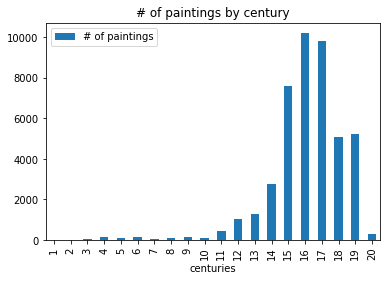

In [4]:
def make_freq_bar_chart(col):
    dct = {}
    print(len(col))
    for el in col:
        if el in dct:
            dct[el] += 1
        else:
            dct[el] = 1
    
    data = {"centuries": [], "# of paintings": []}
    for el in sorted(dct.items(), key=lambda x: x[0]):
        data['centuries'].append(el[0])
        data['# of paintings'].append(el[1])
    df = pandas.DataFrame(data=data)
    print(df.head())
    return df.plot.bar(x="centuries", y="# of paintings", title="# of paintings by century");
    #plot.show(block=True);

df = df[df[1] <= 2020]
make_freq_bar_chart(df['century'])
# df.hist(column='century')[0]
# sns.distplot(df['century'], kde=False, rug=True);

44655
   centuries  # of paintings
0          0            3685
1          1            1716
2          2            1048
3          3            2497
4          4            5089


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


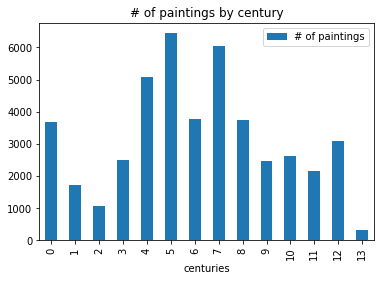

In [5]:
def year2class(year):
    bounds = [i + 1 for i in range(1300, 2051, 50)]
    # print(bounds)
    for i in range(len(bounds)):
        if year < bounds[i]:
            # print(year, bounds[i], i)
            return i
    raise Exception(year)
        


df['classes'] = df[1].apply(year2class)
make_freq_bar_chart(df['classes'])

Для большего баланса классов было решено объединить период 201-1300 гг  
![](../README/data.png)  


In [6]:
to_process = df[df['classes'] < 13]
to_process.head()

,0,1,century,classes
0,42b4327281e1bb16e19647d5aac727ab.jpg,1574,16,6
1,f0aa8fe52e17ae347b51f5447b63401c.jpg,1598,16,6
2,a16b6a572701af2fba7ad2f4fc01a01c.jpg,1602,17,7
3,b8c48933d18e247f02f204f758280a63.jpg,1595,16,6
4,57cb980521e2a7772224a782c34367d4.jpg,1593,16,6


In [7]:
class2ids = dict()
for row in to_process.iterrows():
    ind = row[0]
    row = row[1]
    cid = row['classes']
    if cid not in class2ids:
        class2ids[cid] = [ind]
    else:
        class2ids[cid].append(ind)
mn = -1
for el in class2ids:
    print(el, len(class2ids[el]))
    if mn == -1 or len(class2ids[el]) < mn:
        mn = len(class2ids[el])
print('mn', mn)

6 3759
7 6052
12 3093
4 5089
5 6452
8 3749
11 2141
10 2616
9 2455
1 1716
3 2497
2 1048
0 3685
mn 1048


In [8]:
from random import shuffle
import pickle

for el in class2ids:
    shuffle(class2ids[el])
    class2ids[el] = class2ids[el][:mn]
good_rows = []
for el in class2ids:
    for rid in class2ids[el]:
        good_rows.append(to_process.loc[rid])
balanced_df = pandas.DataFrame(good_rows)
balanced_df.head()

with open('balanced.pkl', 'wb') as file:
    pickle.dump(balanced_df, file=file)

Для решения задачи была использована следующая модель:
![](../README/model_architecture.png)  
- Сеть vgg19 до слоя conv_5_1 (1)


In [10]:
from PIL import Image
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import torch

device = torch.device('cpu' if torch.cuda.device_count() == 0 else 'cuda:0')
DATA_SIZE = 224

class RudeResize:
    def __init__(self, image_size=DATA_SIZE):
        self.image_size = image_size
    
    def __call__(self, img):
        return img.resize((self.image_size, self.image_size))

def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

class MyTransform:
    def __init__(self):
        model_ft = models.vgg19(pretrained=True)
        self.net = torch.nn.Sequential(
           *model_ft.features[:26],
        ).to(device)
        
        self.before = transforms.Compose([
            RudeResize(DATA_SIZE),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
        
        print(self.net)
    
    def __call__(self, img):
        img = self.before(img).to(device)
        with torch.no_grad():
            img = self.net(img.unsqueeze(0))
        img = gram_matrix(img).cpu().view(-1)
        return img.numpy()

transform = MyTransform()

def net_row_transform(row):
    path = os.path.join('../../data/wga/art/', row[0])
    class_id = row['classes']
    try:
        img = Image.open(path).convert("RGB")
    except:
        return None
    return transform(img),  class_id

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [11]:
import numpy
saved_features = numpy.load('features8000.npy')# numpy.array([el[1] for el in left_features])
with open('balanced.pkl', 'rb') as file:
    balanced_df = pickle.load(file)
X = []
y = []
for row in tqdm(balanced_df.iterrows(), total=len(balanced_df)):
    result = net_row_transform(row[1])
    if result is None:
        print('ooops', list(row[1]))
        continue
    arr, class_id = result
    good_features = arr[saved_features]
    X.append(good_features)
    y.append(class_id) 

ooops ['b4010de45a85ab318691b070e586ea1e.jpg', 1559, 16, 6]
ooops ['072ac2f12a5e4bfb0ff29bffdee32e79.jpg', 1567, 16, 6]
ooops ['6c36f0b54f33fbc93a1d02a5fb2a4c1e.jpg', 1563, 16, 6]
ooops ['750fd9b65254db27ce22a71fba52e8a6.jpg', 1562, 16, 6]
ooops ['1e68d85bd2f2815e9ffa2c2dfe22dbc8.jpg', 1580, 16, 6]
ooops ['123d5864f336d4d6e83e58e125e2cdd8.jpg', 1552, 16, 6]
ooops ['0c1109157c4e72398dcfb47e0b247740.jpg', 1570, 16, 6]
ooops ['f116faaa1a9f02600d982fbb76335be4.jpg', 1588, 16, 6]
ooops ['7bec39db981296a3463db769ca440820.jpg', 1562, 16, 6]
ooops ['fb8017d12d51d7d0af8092e25d1b6a81.jpg', 1580, 16, 6]
ooops ['73a1c29319aa16334865473d3d7d6058.jpg', 1646, 17, 7]
ooops ['53ac32cfb1a32792146578c16903b6b1.jpg', 1622, 17, 7]
ooops ['51ff9935bd250f75d1183ad7d6767aee.jpg', 1626, 17, 7]
ooops ['5b4664f2d028ced1bfe12d106ebdc5e7.jpg', 1894, 19, 12]
ooops ['3f97db6cb7ef3901c5c0efd222adfaff.jpg', 1894, 19, 12]
ooops ['1bc4719b34f1203302dbb7dae85bcf0d.jpg', 1888, 19, 12]
ooops ['59eaac23a567379876c90c0aed6d4

13624
   centuries  # of paintings
0          0            1048
1          1            1048
2          2            1048
3          3            1048
4          4            1048


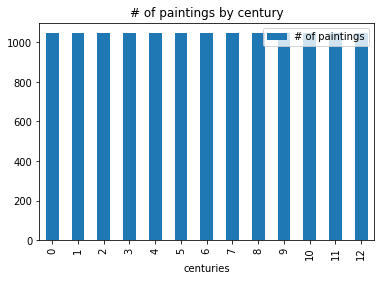

In [12]:
make_freq_bar_chart(balanced_df['classes'])

In [34]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import numpy
import joblib
clf = joblib.load(open('linear_svc_balanced.pkl', 'rb'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)
y_test = [el + 16 for el in y_test]

predicted = clf.predict(X_test)

confusion = confusion_matrix(y_test, predicted)
print(confusion)
print(f1_score(y_test, predicted, average='micro'))
print(f1_score(y_test, predicted, average='macro'))
sns.heatmap(confusion)